In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("E:/accident_severity_analytics/data/processed/Cleaned_US_Accidents.csv", parse_dates=["Start_Time", "End_Time", "Weather_Timestamp"])
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident,state route 32,...,False,False,False,True,False,Night,Night,Day,Day,30.000000
1,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident,i-75,...,False,False,False,False,False,Night,Day,Day,Day,30.000000
2,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident,miamisburg centerville road,...,False,False,False,True,False,Day,Day,Day,Day,30.000000
3,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident,westerville road,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
4,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident,woodward avenue,...,False,False,False,False,False,Day,Day,Day,Day,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335823,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,Accident,pomona fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.600000
6335824,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,Accident,i-8,...,False,False,False,False,False,Day,Day,Day,Day,26.883333
6335825,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,Accident,garden grove fwy,...,False,False,False,False,False,Day,Day,Day,Day,28.466667
6335826,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,Accident,san diego fwy,...,False,False,False,False,False,Day,Day,Day,Day,29.350000


In [3]:
df['Severity'].unique()

array([2, 3, 1, 4])

In [4]:
print(df['Severity'].value_counts(normalize=True))

Severity
2    0.783573
3    0.180971
4    0.025072
1    0.010384
Name: proportion, dtype: float64


In [6]:
df.shape

(6335828, 42)

In [7]:
df_sample = df.sample(n=100_000, random_state=42)

In [8]:
y = df_sample['Severity']

In [9]:
selected_features = [
    'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Railway', 'Traffic_Signal',
    'Weather_Condition', 'Wind_Direction', 'State', 'City', 'Duration'
]
X = df_sample[selected_features]


In [ ]:
X = X.dropna() 
y = y.loc[X.index]


In [11]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Weather_Condition', 'Wind_Direction', 'State', 'City']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

[[   11   178     9     0]
 [    8 15312   404     3]
 [    0  2577  1024     0]
 [    1   463     6     4]]
              precision    recall  f1-score   support

           1       0.55      0.06      0.10       198
           2       0.83      0.97      0.89     15727
           3       0.71      0.28      0.41      3601
           4       0.57      0.01      0.02       474

    accuracy                           0.82     20000
   macro avg       0.66      0.33      0.35     20000
weighted avg       0.80      0.82      0.78     20000

F1 Score: 0.7774549621095264


In [15]:
from sklearn.preprocessing import LabelEncoder

le_y = LabelEncoder()
y_train_enc = le_y.fit_transform(y_train)
y_test_enc = le_y.transform(y_test)



In [2]:
xgb_model = XGBClassifier( eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_enc)
y_pred_xgb = xgb_model.predict(X_test)


NameError: name 'X_train' is not defined

In [18]:
y_pred_labels = le_y.inverse_transform(y_pred_xgb)


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))
print("F1 Score (XGBoost):", f1_score(y_test, y_pred_labels, average='weighted'))


[[   23   158    17     0]
 [    9 14942   750    26]
 [    1  1907  1684     9]
 [    1   406    36    31]]
              precision    recall  f1-score   support

           1       0.68      0.12      0.20       198
           2       0.86      0.95      0.90     15727
           3       0.68      0.47      0.55      3601
           4       0.47      0.07      0.11       474

    accuracy                           0.83     20000
   macro avg       0.67      0.40      0.44     20000
weighted avg       0.81      0.83      0.81     20000

F1 Score (XGBoost): 0.8133824349156443


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train_enc)

xgb_model_sm = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = xgb_model_sm.predict(X_test)

y_pred_labels_sm = le.inverse_transform(y_pred_sm)

print(confusion_matrix(y_test, y_pred_labels_sm))
print(classification_report(y_test, y_pred_labels_sm))
print("F1 Score (XGBoost + SMOTE):", f1_score(y_test, y_pred_labels_sm, average='weighted'))


c:\Users\Amer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:19:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[   67   108    20     3]
 [  268 14072  1132   255]
 [   45  1682  1797    77]
 [    3   343    38    90]]
              precision    recall  f1-score   support

           1       0.17      0.34      0.23       198
           2       0.87      0.89      0.88     15727
           3       0.60      0.50      0.55      3601
           4       0.21      0.19      0.20       474

    accuracy                           0.80     20000
   macro avg       0.46      0.48      0.46     20000
weighted avg       0.80      0.80      0.80     20000

F1 Score (XGBoost + SMOTE): 0.7983201689871718


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train_encoded)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_sm, y_train_sm)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

y_pred_original = label_encoder.inverse_transform(y_pred_best)

print(confusion_matrix(y_test, y_pred_original))
print(classification_report(y_test, y_pred_original))
print("F1 Score (Tuned XGBoost):", f1_score(y_test, y_pred_original, average='weighted'))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
[[   39   139    19     1]
 [   79 14530  1011   107]
 [    8  1717  1836    40]
 [    2   369    49    54]]
              precision    recall  f1-score   support

           1       0.30      0.20      0.24       198
           2       0.87      0.92      0.89     15727
           3       0.63      0.51      0.56      3601
           4       0.27      0.11      0.16       474

    accuracy                           0.82     20000
   macro avg       0.52      0.44      0.46     20000
weighted avg       0.80      0.82      0.81     20000

F1 Score (Tuned XGBoost): 0.8111272549256824


In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

param_dist = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.7, 0.9, 1.0],
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train_encoded)

print("Best Parameters:", search.best_params_)

y_pred = search.predict(X_test)

y_pred_decoded = y_pred + 1

print(classification_report(y_test, y_pred_decoded))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Amer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'clf__subsample': 0.9, 'clf__n_estimators': 200, 'clf__max_depth': 7, 'clf__learning_rate': 0.2}
              precision    recall  f1-score   support

           1       0.22      0.25      0.23       198
           2       0.87      0.91      0.89     15727
           3       0.62      0.52      0.56      3601
           4       0.26      0.14      0.18       474

    accuracy                           0.82     20000
   macro avg       0.49      0.46      0.47     20000
weighted avg       0.80      0.82      0.81     20000



In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier

y_train_encoded = y_train - 1
y_test_encoded = y_test - 1

pipeline = Pipeline([
    ('smote', SMOTETomek(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

param_dist = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.7, 0.9, 1.0],
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


search.fit(X_train, y_train_encoded)

print("Best Parameters:", search.best_params_)

y_pred = search.predict(X_test)

y_pred_decoded = y_pred + 1

print(classification_report(y_test, y_pred_decoded))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


c:\Users\Amer\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:27:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'clf__subsample': 0.9, 'clf__n_estimators': 200, 'clf__max_depth': 7, 'clf__learning_rate': 0.2}
              precision    recall  f1-score   support

           1       0.21      0.23      0.22       198
           2       0.87      0.91      0.89     15727
           3       0.63      0.51      0.56      3601
           4       0.26      0.16      0.20       474

    accuracy                           0.82     20000
   macro avg       0.49      0.45      0.47     20000
weighted avg       0.80      0.82      0.81     20000



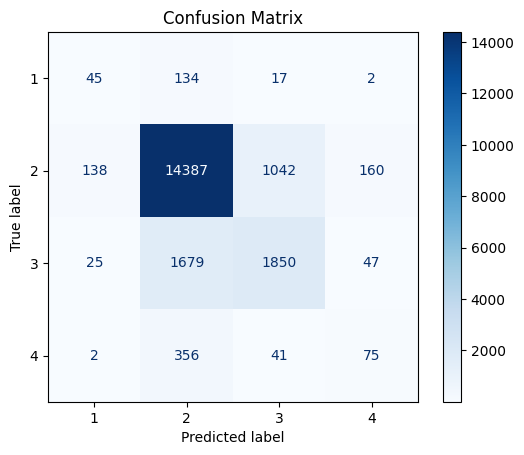

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_decoded, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [31]:
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("F1 Score (Balanced RF):", f1_score(y_test, y_pred, average='weighted'))


[[ 143    8   41    6]
 [1543 7356 3581 3247]
 [ 290  289 2550  472]
 [   3   46   28  397]]
              precision    recall  f1-score   support

           1       0.07      0.72      0.13       198
           2       0.96      0.47      0.63     15727
           3       0.41      0.71      0.52      3601
           4       0.10      0.84      0.17       474

    accuracy                           0.52     20000
   macro avg       0.38      0.68      0.36     20000
weighted avg       0.83      0.52      0.59     20000

F1 Score (Balanced RF): 0.592928556988606
